<a href="https://colab.research.google.com/github/HeshanNavindu-7/oilspill-detection/blob/main/oilspill_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/saanvitayal07/oil-spill-and-no-oil-spill")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saanvitayal07/oil-spill-and-no-oil-spill


100%|██████████| 26.5M/26.5M [00:00<00:00, 93.3MB/s]


In [4]:
import os
import random
import matplotlib.pyplot as plt
import cv2

#define path
dataset_dir="/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix"
class_count={}
for detection_class in os.listdir(dataset_dir):
  print(detection_class)
  class_dir= os.path.join(dataset_dir,detection_class)
  if os.path.isdir(class_dir):
    num_images=len(os.listdir(class_dir))
    class_count[detection_class]=num_images




train
test


Train Data
Displaying 4 samples from 'nospill' class:
Displaying 4 samples from 'oilspill' class:


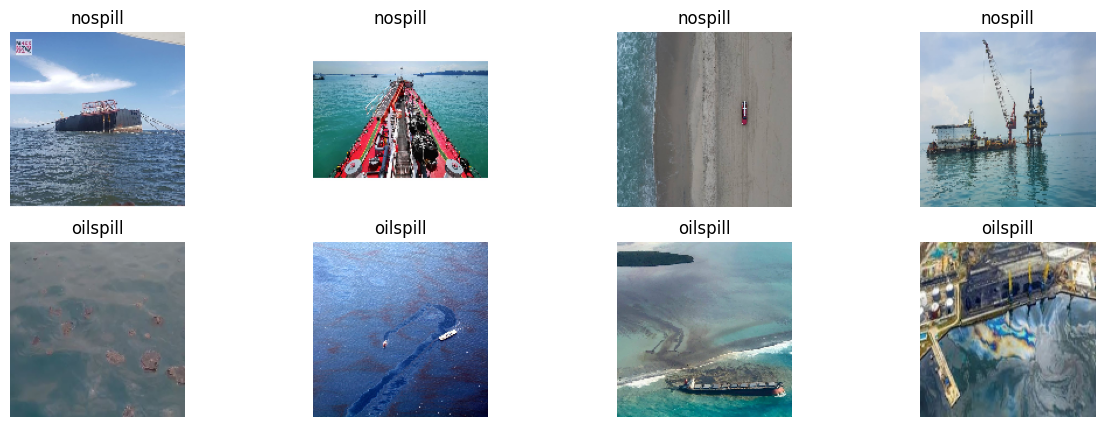

Test Data
Displaying 4 samples from 'nospill' class:
Displaying 4 samples from 'oilspill' class:


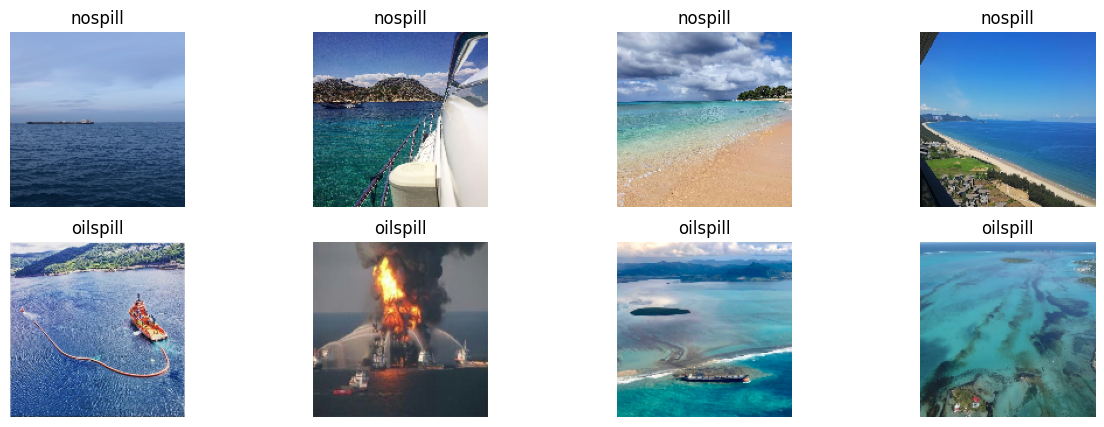

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

# Define subdirectories for train and test data
train_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/train'
test_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/test'

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Define classes
classes = ['nospill', 'oilspill']

# Display sample data
def display_sample(directory, num_samples=4):
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(15, 5))
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        print(f"Displaying {num_samples} samples from '{class_name}' class:")

        for j, filename in enumerate(os.listdir(class_dir)):
            if j >= num_samples:
                break
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, target_size)  # Resize image
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(class_name)
    plt.show()

print("Train Data")
display_sample(train_dir)
print("Test Data")
display_sample(test_dir)


Found 197 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Augmented Images


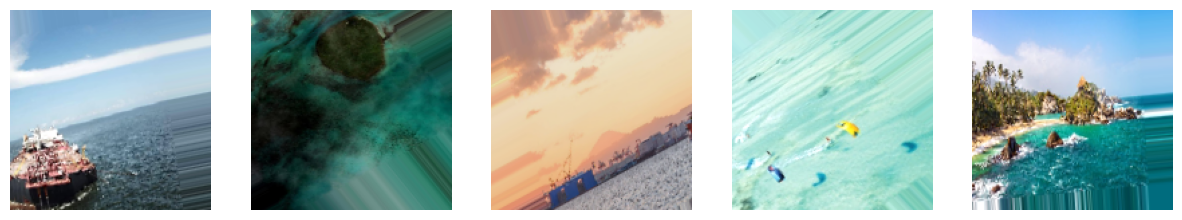

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define directories (adjust these paths to your setup)
train_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/train'
test_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/test'

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]  # Adjust brightness
)

# For validation, we only rescale
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Function to display augmented images
def display_augmented_images(generator, num_images=5):
    # Get a batch of images and labels
    sample_data, _ = next(generator)

    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = sample_data[i]
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

# Display augmented images
print("Augmented Images")
display_augmented_images(train_generator, num_images=5)


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os


In [42]:
from tensorflow.keras import layers

model = Sequential([
  layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Start with fewer filters
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, (3, 3), activation='relu'),
  # Consider removing additional pooling layer for small datasets
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),  # Experiment with number of units
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 conv2d_18 (Conv2D)          (None, 70, 70, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 313600)            0         
                                                                 
 dense_8 (Dense)             (None, 256)               80281856  
                                                      

In [43]:
!pip install visualkeras

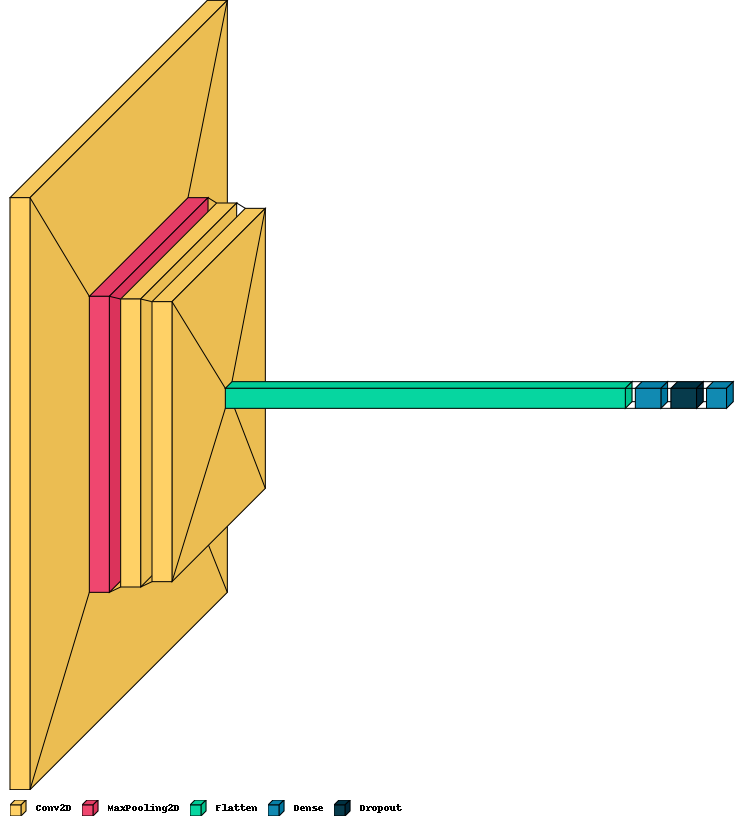

In [44]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [45]:

# Model Compilation (Hyperparameters can be further tuned)
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])



In [46]:
# Train the model using generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples,

)

Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 5.1587 - accuracy: 0.5091

6/6 [==============================] - 25s 4s/step - loss: 5.1587 - accuracy: 0.5091 - val_loss: 1.3356 - val_accuracy: 0.5510
Epoch 2/10
6/6 [==============================] - 20s 3s/step - loss: 1.0467 - accuracy: 0.5212
Epoch 3/10
6/6 [==============================] - 20s 3s/step - loss: 0.6867 - accuracy: 0.5455
Epoch 4/10
6/6 [==============================] - 19s 3s/step - loss: 0.6835 - accuracy: 0.5212
Epoch 5/10
6/6 [==============================] - 21s 3s/step - loss: 0.6739 - accuracy: 0.5758
Epoch 6/10
6/6 [==============================] - 19s 3s/step - loss: 0.6560 - accuracy: 0.5758
Epoch 7/10
6/6 [==============================] - 19s 3s/step - loss: 0.6649 - accuracy: 0.6000
Epoch 8/10
6/6 [==============================] - 19s 3s/step - loss: 0.6337 - accuracy: 0.6727
Epoch 9/10
6/6 [==============================] - 18s 3s/step - loss: 0.6139 - accuracy: 0.6667
Epoch 10/10
6/6 [==============================] - 18s 3s/step - loss: 0.6492 - accuracy: 0.5939


In [47]:
# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='binary'  # Since it's a binary classification task
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Found 49 images belonging to 2 classes.
2/2 [==============================] - 1s 184ms/step - loss: 0.5917 - accuracy: 0.6939
Test Loss: 0.5917415618896484
Test Accuracy: 0.6938775777816772
